# KNN MODEL ON HEART DISEASE CLASSIFICATION

## Importing libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
%matplotlib inline

## Importing data

In [23]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring the data

In [24]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
#checking data types
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [26]:
#count the number of patients who have heart disease
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

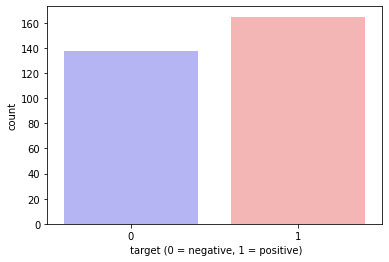

In [27]:
#count visualization
sns.countplot(x="target", data=df, palette="bwr")
plt.xlabel(" target (0 = negative, 1 = positive)")
plt.show()

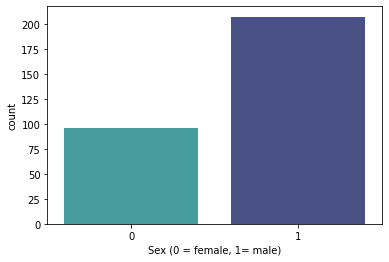

In [28]:
# classify target variable between male and female and visualize the result
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

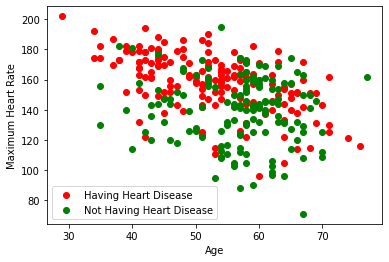

In [29]:
#visualizing relation between "Maximum Heart Rate" and "Age"
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c = 'green')
plt.legend(["Having Heart Disease", "Not Having Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Data Preprocessing

In [30]:
#extracting x and y from the data
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print('Dimentionality of x is : ', x.shape)
print('Dimentionality of y is : ', y.shape)

Dimentionality of x is :  (303, 13)
Dimentionality of y is :  (303,)


In [36]:
#feature scaling
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [37]:
#splitting x and y into training and test set
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25,random_state=0)

## Creating and Training KNN model

In [38]:
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=7)

In [39]:
#Predicting from the model
y_pred = knn.predict(x_te)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
#Plotting confusion matrix to check accuracy
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[25  8]
 [ 3 40]]


In [41]:
#Evaluating the Algorithm
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



In [42]:
#15- fold cross_validation (cv=15) with k=7
#Instantaneous Model
classifier = KNeighborsClassifier(n_neighbors = 7)
score = cross_val_score(classifier, x , y , cv=15 , scoring = 'accuracy')
print(score)
print(score.mean())

[0.85714286 0.80952381 0.80952381 0.8        0.95       0.95
 0.85       0.9        0.65       0.9        0.8        0.9
 0.65       0.7        0.7       ]
0.8150793650793651


In [43]:
#Searching optimal value of k
k_range = range(1,15)
k_scores = []
#looping through all values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv=15, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print(scores.mean())    

[0.762063492063492, 0.7488888888888889, 0.8185714285714287, 0.8249206349206347, 0.8182539682539682, 0.8315873015873015, 0.8150793650793651, 0.8314285714285713, 0.8384126984126984, 0.844920634920635, 0.8380952380952381, 0.8380952380952382, 0.8280952380952383, 0.8380952380952382]
0.8380952380952382


Text(0, 0.5, 'Cross_Validated_Accuracy')

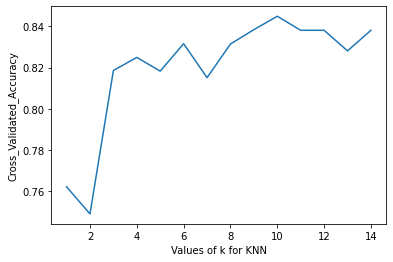

In [44]:
#plotting the value of accuracy vs k
plt.plot(k_range, k_scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Cross_Validated_Accuracy')

## Optimum KNN Model

In [56]:
knn = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
knn.fit(x_tr,y_tr)
y_pred = knn.predict(x_te)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [57]:
#Plotting confusion matrix
cm = confusion_matrix(y_te, y_pred)
print(cm)

[[25  8]
 [ 4 39]]


In [58]:
#Evaluating the Algorithm
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.83      0.91      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.84        76
weighted avg       0.84      0.84      0.84        76



In [59]:
#15- fold cross_validation (cv=15) with k=9
#Instantaneous Model
classifier = KNeighborsClassifier(n_neighbors = 10)
score = cross_val_score(classifier, x , y , cv=15 , scoring = 'accuracy')
print(score)
print(score.mean())

[0.85714286 0.85714286 0.80952381 0.85       0.9        0.95
 0.85       0.95       0.85       0.9        0.8        0.8
 0.7        0.75       0.85      ]
0.844920634920635
